In [2]:
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree

A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It works by splitting the dataset into smaller subsets based on features until it reaches a decision about the target variable.

# Decision Tree Research Task

# How Decision Trees Work

A Decision Tree is built by recursively splitting the dataset into subsets based on the most significant feature at each level. This process continues until the subsets become homogeneous (contain instances of a single class) or meet a stopping criterion (like maximum depth).

### Glossary

- **Node**: Represents a decision point (feature or condition).
- **Root Node**: The topmost node representing the entire dataset.
- **Internal Node**: A decision point based on one feature.
- **Leaf Node**: Represents the final decision (output class or value).
- **Splitting**: Dividing a dataset based on some condition.

### Math Behind Decision Trees

The algorithm chooses the best split by minimizing a loss function. For classification, it often uses **Gini Impurity** or **Entropy (Information Gain)** as the criterion to evaluate the splits.

#### Gini Impurity:

The Gini Impurity for a node is calculated as:

$$ G = 1 - \sum_{i=1}^{n} p_i^2 $$

Where \( p_i \) is the probability of a class at the node.

The Gini impurity index asks the question: If I take two pairs out of a set, what are the chances of me getting two different types of pairs?

The lower the Gini, the more I'm sure of what I'm going to get. If I can divide the two parts in such a way that I'm not of what Im going to get, I can create groups of distinct objects, e.g I can classify.

#### Information Gain (Entropy):

Entropy is a measure of uncertainty or randomness:

$$ H(S) = - \sum_{i=1}^{n} p_i \log_2(p_i) $$

Information Gain is the reduction in entropy after a split. The goal is to maximize this gain during the tree construction.

---

### When should you use what

Generally, very very generally, when you want more speed you use Gini. When you want better performance (especially in many labels datasets) you use Entropy. In practice, most of the time it will be the same.

## Training Process

The tree goes through every feature. Lets say my feature is continous and it has 100 unique values, for example 1, 2, 3, 4, 5, etc.

It will do the average between 1 and 2 (1.5). The average between 2 and 3 (2.5), etc. For every distinct label.

For example, if I've got features with numbers 1, 2, 3, 4, 5
I calculate a threshold by averaging every 2 consecutive numbers (e.g. 1-2, 2-3, 3-4, 4-5)

This is the threshold by which the algorithm will try to split the data and find the best solution. The goal is to reach minimum impurity.

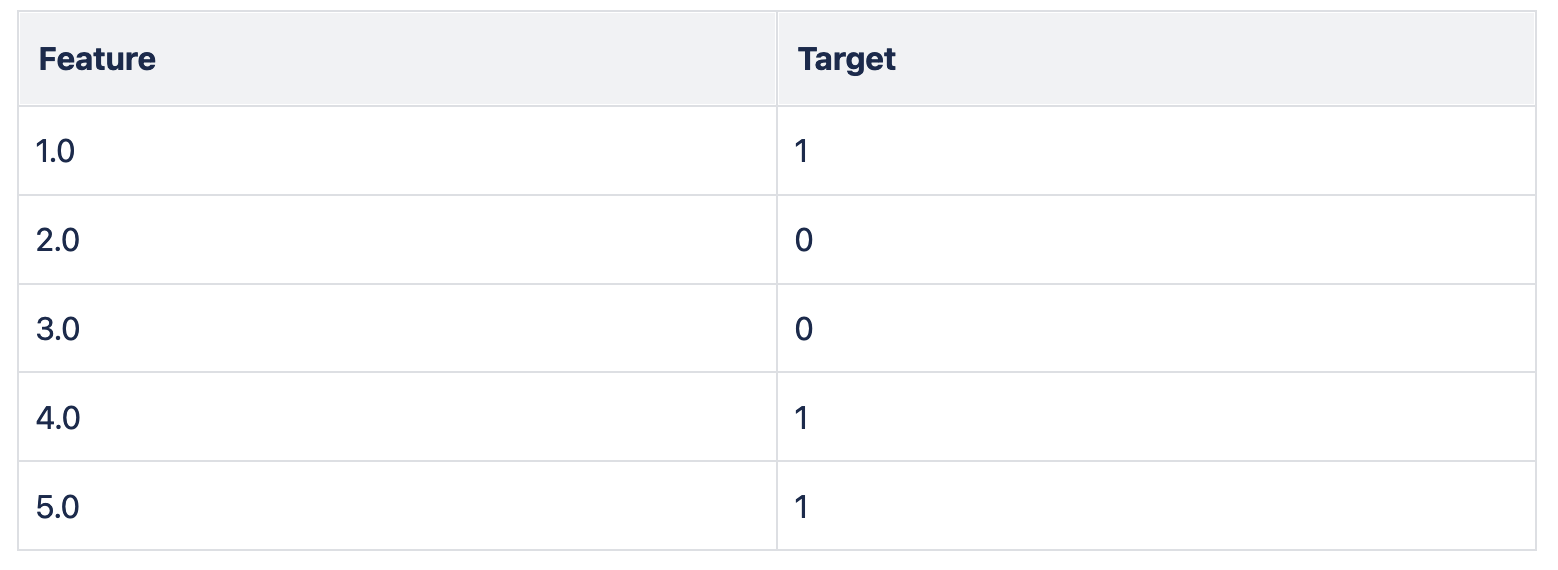

We check the first threshold which is (1+2)/2 = 1.5.

Threshold 1.5 -> what would be the impurity if we divide the dataset by this feature using this threshold.

Left subset -> feature <= 1.5 --> [1.0] --> 1

$$ G = 1 - \sum_{i=1}^{n} p_i^2 $$

Gini impurity ->  1 - (1^2) = 0

Right subset -> feature > 1.5 --> [2.0, 3.0, 4.0, 5.0] --> [0 , 0, 1, 1]

Gini impurity = 1 - (0.5^2 + 0.5^2) = 0.5

**Weighted Gini** -> Left subset: 1 sample. Right subset: 4 samples.

Weighted Gini = 1 * 0 + 4 * 0.5 = 2

We run this calculation for every threshold. We choose the lowest number. Lets say we calculated everything and seen the minimal weighted gini is when we divide the feature by <= 2.5. This is what we do then, the first division is when the dataset is divided by this feature, <=2.5

Lets say this feature is height. But we have other features like age, sex, etc. What happens to them? The same check we did with height, we do with ALL features in ALL their levels. We check every combination.

Still, we concluded that height <= 2.5 is best. What now?
We take these two datasets, bigger than this height and smaller than this height and do the exact same check all over again. We check all features, including height, in all their levels.

### Where Do We Stop?

There are a few conditions in which we can stop:
1. Max depth - hyperparameter we decide upon. Stop if we cross it.
2. Min samples split - stop if a node has fewer samples than decided hyperparameter.
3. Pure nodes - if all samples belong to the same class.
4. No information gain - splitting further does not improve impurity.

## Model Training

In [3]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [5]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [6]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X_test.loc[73]

sepal length (cm)    6.1
sepal width (cm)     2.8
petal length (cm)    4.7
petal width (cm)     1.2
Name: 73, dtype: float64

In [8]:
X_test.iloc[2]

sepal length (cm)    7.7
sepal width (cm)     2.6
petal length (cm)    6.9
petal width (cm)     2.3
Name: 118, dtype: float64

In [9]:
y_test[:3]

73     1
18     0
118    2
dtype: int64

In [10]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [31]:
X_test[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [29]:
y_test[:5]

73     1
18     0
118    2
78     1
76     1
dtype: int64

In [30]:
y_pred[:5]

array([1, 0, 2, 1, 1])

In [17]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
X_test[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3


petal length > 2.45 ---- petal length <= 4.75 ----- petal width <= 1.65 ---> 1

In [37]:
(4.4+5.0)/2

4.7

In [38]:
5.05

5.05

In [39]:
(5.1+6.2)/2

5.65

In [41]:
X['sepal width (cm)']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [40]:
X['sepal width (cm)'].value_counts() --> 20 different unique values. 4.4, 5.0, 5.1, 6.2.

SyntaxError: invalid syntax (1715367177.py, line 1)

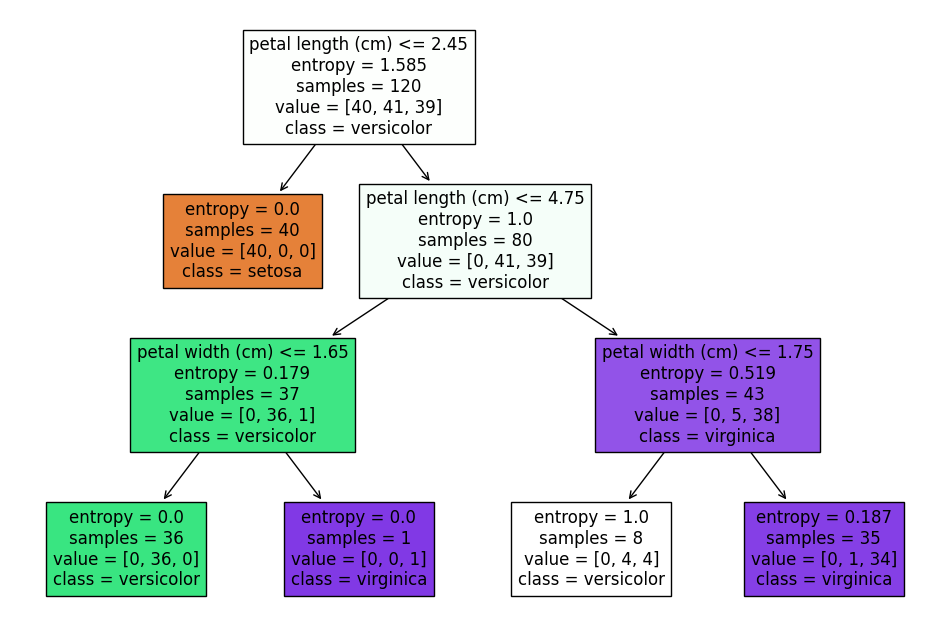

In [11]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

# Decision Tree From Scratch

In [12]:

# Function to compute entropy
def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Function to compute information gain
def information_gain(X_column, y, threshold):
    parent_entropy = entropy(y)

    left_idxs = X_column <= threshold
    right_idxs = X_column > threshold

    if len(y[left_idxs]) == 0 or len(y[right_idxs]) == 0:
        return 0

    n = len(y)
    n_left, n_right = len(y[left_idxs]), len(y[right_idxs])

    left_entropy = entropy(y[left_idxs])
    right_entropy = entropy(y[right_idxs])

    child_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy

    return parent_entropy - child_entropy

# Class to represent a node in the decision tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        if (depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        best_feature, best_threshold = self._best_criteria(X, y, num_features)
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)

        return Node(best_feature, best_threshold, left, right)

    def _best_criteria(self, X, y, num_features):
        best_gain = -1
        split_idx, split_threshold = None, None
        for feature_idx in range(num_features):
            X_column = X[:, feature_idx]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                gain = information_gain(X_column, y, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold

        return split_idx, split_threshold

    def _split(self, X_column, threshold):
        left_idxs = np.argwhere(X_column <= threshold).flatten()
        right_idxs = np.argwhere(X_column > threshold).flatten()
        return left_idxs, right_idxs

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [13]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Train the Decision Tree from scratch
tree = DecisionTree(max_depth=3)
tree.fit(X_train_np, y_train_np)

# Predict and evaluate
y_pred_scratch = tree.predict(X_test_np)
accuracy_scratch = np.sum(y_pred_scratch == y_test_np) / len(y_test_np)
print(f'Accuracy (from scratch): {accuracy_scratch}')

Accuracy (from scratch): 0.9666666666666667


# Heart Disease

In [14]:
heart_disease_df = pd.read_csv('datasets/heart-disease.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/heart-disease.csv'

In [ ]:
X = heart_disease_df.drop(['target'], axis=1)
y = heart_disease_df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')